In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#  Loading Data

path = "./PS_20174392719_1491204439457_log.csv"
load_data = pd.read_csv(path)


In [3]:
# Menampilkan 5 baris data

df=pd.DataFrame(load_data)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Note:

- **step** : Merepresentasikan unit waktu di dunia nyata. Dalam kasus ini, 1 step adalah 1 jam waktu. Total step adalah 744 (simulasi 30 hari).
- **type** : Jenis transaksi, yaitu **CASH-IN**, **CASH-OUT**, **DEBIT**, **PAYMENT**, dan **TRANSFER**.
- **amount** : Jumlah transaksi 
- **nameOrig** : Pelanggan yang memulai transaksi.
- **oldbalanceOrg** : Saldo awal sebelum transaksi dilakukan.
- **newbalanceOrig** : Saldo baru setelah transaksi dilakukan.
- **nameDest** : Pelanggan yang menjadi penerima transaksi.
- **oldbalanceDest** : Saldo awal penerima sebelum transaksi. 
- **newbalanceDest** : Saldo baru penerima setelah transaksi.
- **isFraud** : Mengkategorikan transaksi, jika penipuan (1) dan bukan penipuan (0)
- **isFlaggedFraud** : mengkategorikan upaya ilegal, jika mentransfer lebih dari 200.000 dalam satu transaksi maka dalam pengawasan (1) dan jika dibawahnya maka bukan pengawasan (0)



In [4]:
# Mengecek jumlah baris & kolom
df.shape

(6362620, 11)

In [5]:
# Mengecek informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Note:
- Jumlah data (rows) : 6362620
- Jumlah kolom : 11
- tipe data bertipe 'int64' : 3 (step, isFraud, isFlaggedFraud)
- tipe data bertipe 'object' : 3 (type, nameOrig, nameDest)
- tipe data bertipe 'float64' : 5 (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest)

In [6]:
# Mengecek jumlah null data

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Note:
- Tidak terdapat nilai null pada keseluruhan data

In [7]:
# Mengecek duplikat

df.duplicated().sum()

np.int64(0)

Note: 
- Tidak terdapat data duplikat pada keseluruhan data

In [8]:
# Analisis statistik deskriptif

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Note:
1. step
- Step 1 - 744 (total 30 hari simulasi)
2. amount
- Rata-rata nominal transaksi adalah 179.861
- Nominal transaksi terkecil adalah 0
- Nominal transaksi terbesar adalah 92.445.520
3. oldbalanceOrg (Saldo Awal Pengirim)
- Rata-rata saldo awal pengirim adalah 833.883
- saldo terkecil adalah 0
- saldo terbesar adalah 59.585.040
4. newbalanceOrig (Saldo Baru Pengirim)
- Rata-rata saldo baru pengirim setelah transaksi adalah 855.113
- saldo terkecil adalah 0
- saldo terbesar adalah 49.585.040
5. oldbalanceDest (Saldo Awal Penerima)
- Rata-rata saldo awal penerima adalah 1.110.702
- saldo terkecil adalah 0
- saldo terbesar adalah 356.019.308
6. newbalanceDest (Saldo Baru Penerima)
- Rata-rata saldo baru penerima adalah 1.224.996
- saldo terkecil adalah 0
- saldo terbesar adalah 356.179.300
7. isFraud
- Rata-rata nilai fraud adalah 0,00129 (0,129% ~ 0,13%)
8. isFlaggedFraud
- Rata-rata nilai isFlaggedFraud adalah 0,0000025 (0,00025%)




In [9]:
# Rename nama kolom

df = df.rename(columns = {'nameOrig' : 'nameOrig',
                          'type':'type',
                          'step': 'step',
                          'amount' : 'amount',
                          'oldbalanceOrg' : 'oldbalanceOrig',
                          'newbalanceOrig': 'newbalanceOrig', 
                          'nameDest' : 'nameDest',
                          'oldbalanceDest' : 'oldbalanceDest',
                          'newbalanceDest': 'newbalanceDest',
                          'isFraud' : 'isFraud',
                          'isFlaggedFraud':'isflaggedFraud'}
                          
                          )

Note:
- Mengganti nama kolom

| Nama Lama       | Nama Baru          |
|-----------------|--------------------|
| nameOrig        | nameOrig           |
| type            | type               |
| step            | step               |
| amount          | amount             |
| oldbalanceOrg   | oldbalanceOrig     |
| newbalanceOrig  | newbalanceOrig     |
| nameDest        | nameDest           |
| oldbalanceDest  | oldbalanceDest     |
| newbalanceDest  | newbalanceDest     |
| isFraud         | isFraud            |
| isFlaggedFraud  | isflaggedFraud     |



<Axes: title={'center': 'Pearson Corelation'}>

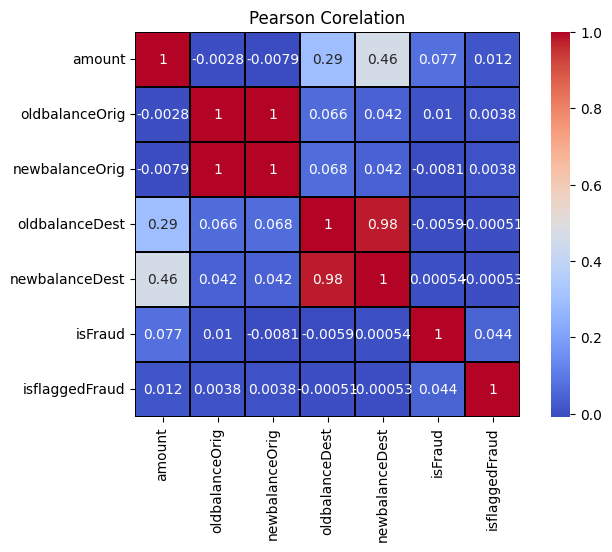

In [10]:
# Memeriksa korelasi variabel

df_cor = df[['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isflaggedFraud']]
f,ax= plt.subplots(figsize=(8,5))
plt.title("Pearson Corelation")
sns.heatmap(df_cor.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap="coolwarm", linecolor='black', annot=True)

Note:
- oldbalanceOrig vs newbalanceOrig: Korelasi sempurna (1), menunjukkan hubungan linear penuh.
- oldbalanceDest vs newbalanceDest: Korelasi hampir sempurna (0.98), menunjukkan hubungan langsung yang sangat kuat.
- amount vs newbalanceDest: Korelasi sedang (0.46), menunjukkan bahwa jumlah transaksi memengaruhi saldo penerima.
- amount vs isFraud: Korelasi rendah (0.077), menunjukkan hubungan yang sangat lemah antara jumlah transaksi dan fraud.

# EDA

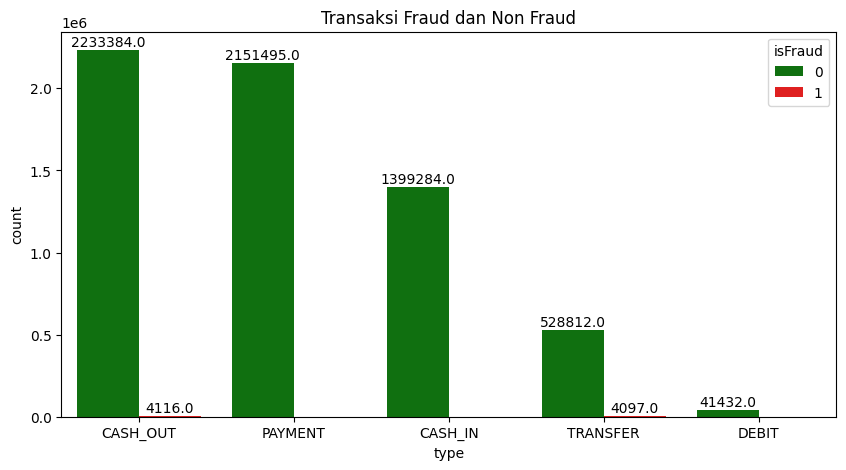

In [11]:
# Distribusi jumlah transaksi berdasarkan "type" dengan kategori "isfraud"

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="type", hue="isFraud", palette=['green','red'], order=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'])
plt.title("Transaksi Fraud dan Non Fraud")

for p in ax.patches:
    if p.get_height() > 10: 
        ax.annotate(
            '{:.1f}'.format(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height() + 5000), 
            ha='center', va='bottom'
        )

plt.show()


Note:
- Transaksi yang terdapat fraud hanyalah jenis CASH_OUT dan TRANSFER dengan masing-masing 4116 dan 4097

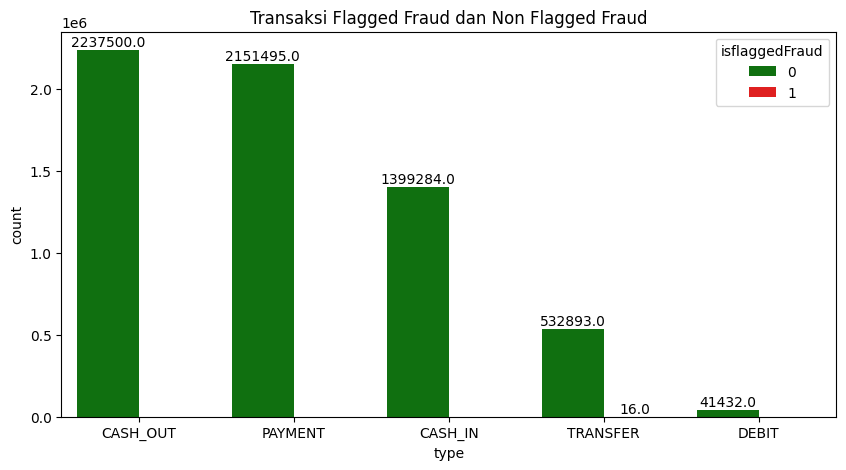

In [12]:
# Distribusi jumlah transaksi berdasarkan "type" dengan kategori "isflaggedfraud"

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="type", hue="isflaggedFraud", palette=['green','red'], order=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'])
plt.title("Transaksi Flagged Fraud dan Non Flagged Fraud")

for p in ax.patches:
    if p.get_height() > 10: 
        ax.annotate(
            '{:.1f}'.format(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height() + 5000), 
            ha='center', va='bottom'
        )

plt.show()

Note:
- Transaksi yang terdapat flagged fraud hanyalah jenis  TRANSFER sebanyak 16 transaksi

In [13]:
Transaksi_upper_200k = df[(df["amount"] > 200000) & (df["type"] == "TRANSFER")]
print("Transaksi yang diduga 'flagged': ",len(Transaksi_upper_200k))

Transaksi yang diduga 'flagged':  409110


Note:
- Transaksi yang diduga 'flagged':  409.110, sehingga feature/kolom 'isflaggedFraud' tidak memuat informasi yang akurat


In [14]:
df.amount.sum()

np.float64(1144392944759.77)

Note:
- Total keseluruhan transaksi: 1144.392.944.759.77 (Satu kuadriliun seratus empat puluh empat triliun tiga ratus sembilan puluh dua miliar sembilan ratus empat puluh empat juta tujuh ratus lima puluh sembilan ribu tujuh ratus tujuh puluh rupiah)

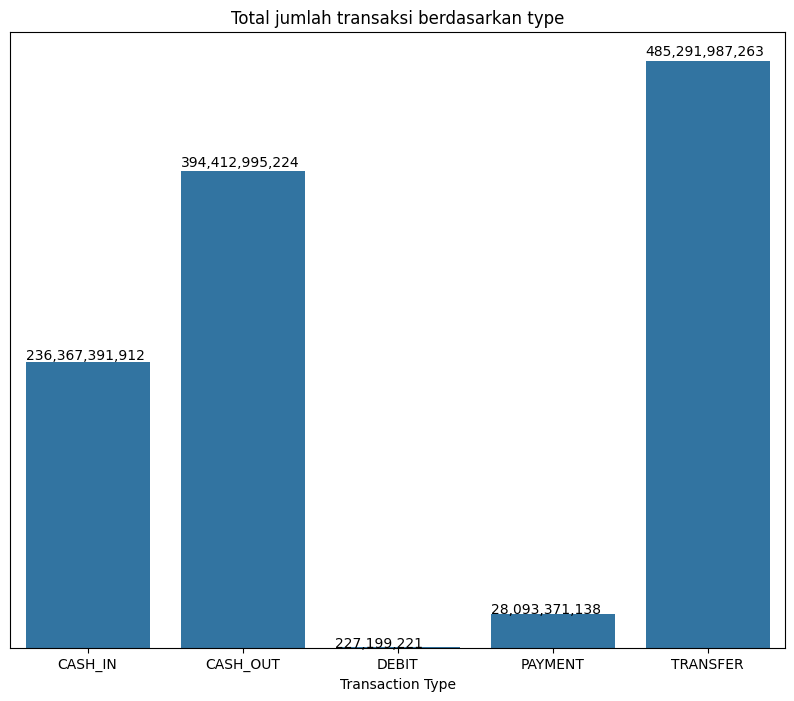

In [15]:
# Total keseluruhan jumlah uang yang transaksikan berdasarkan type

d = df.groupby('type')['amount'].sum()
plt.figure(figsize=(10,8))
ax = sns.barplot(x=d.index,y=d.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0, p.get_height()*1.01))
    
plt.title("Total jumlah transaksi berdasarkan type")
plt.yticks([])
plt.xlabel("Transaction Type")
plt.show()

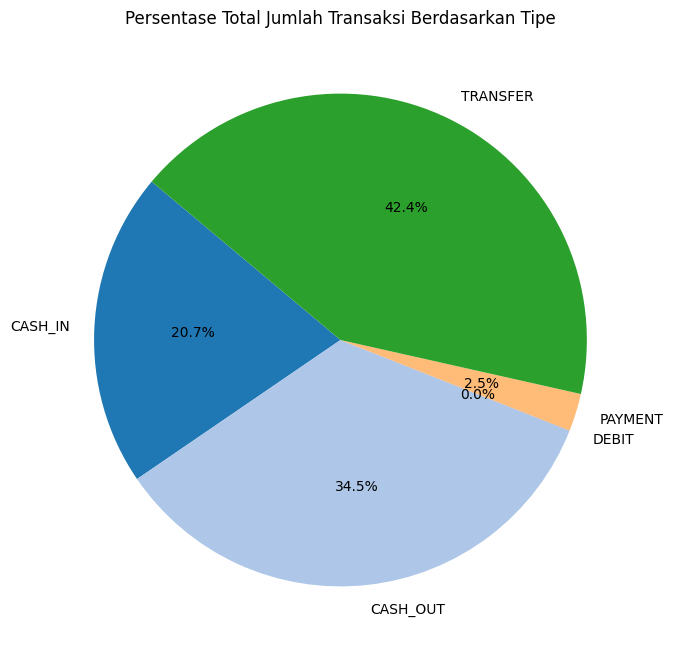

In [16]:
# Data transaksi berdasarkan tipe
transaction_types = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
transaction_amounts = [236367391912, 394412995224, 227199221, 28093371138, 485291987263]

# Total transaksi keseluruhan
total_transactions = sum(transaction_amounts)

# Hitung persentase masing-masing tipe
transaction_percentages = [(amount / total_transactions) * 100 for amount in transaction_amounts]

# Membuat diagram lingkar
plt.figure(figsize=(8, 8))
plt.pie(transaction_percentages, labels=transaction_types, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Persentase Total Jumlah Transaksi Berdasarkan Tipe")
plt.show()


Note:

- Total Jumlah Transaksi Berdasarkan Tipe

1. **CASH_IN**: 236,367,391,912 - 20.7% 
(Dua ratus tiga puluh enam miliar tiga ratus enam puluh tujuh juta tiga ratus sembilan puluh satu ribu sembilan ratus dua belas)

2. **CASH_OUT**: 394,412,995,224 - 34.5% 
(Tiga ratus sembilan puluh empat miliar empat ratus dua belas juta sembilan ratus sembilan puluh lima ribu dua ratus dua puluh empat)

3. **DEBIT**: 227,199,221 - 0.0% 
(Dua ratus dua puluh tujuh juta seratus sembilan puluh sembilan ribu dua ratus dua puluh satu)

4. **PAYMENT**: 28,093,371,138 - 34.5%  
(Dua puluh delapan miliar sembilan puluh tiga juta tiga ratus tujuh puluh satu ribu seratus tiga puluh delapan)

5. **TRANSFER**: 485,291,987,263 - 42.4%  
(Empat ratus delapan puluh lima miliar dua ratus sembilan puluh satu juta sembilan ratus delapan puluh tujuh ribu dua ratus enam puluh tiga)
- CASH_OUT dan TRANSFER adalah 879,704,982 - 76.9% 
(Delapan ratus tujuh puluh sembilan miliar tujuh ratus empat juta sembilan ratus delapan puluh dua ribu empat ratus delapan puluh tujuh)

C:\Users\burv\AppData\Local\Temp\ipykernel_14644\4073139858.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df['amount']))


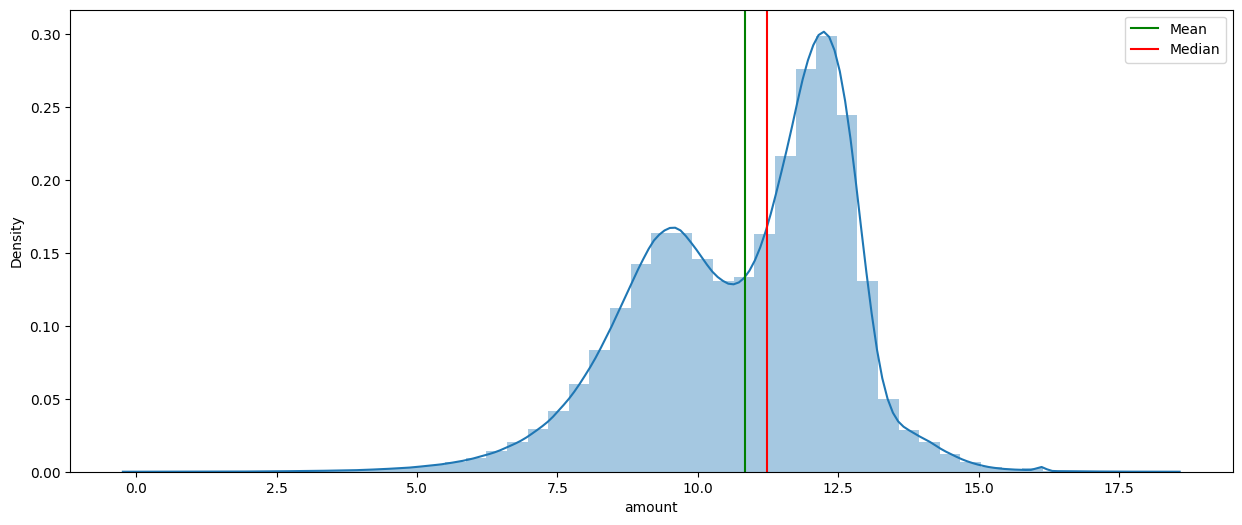

In [17]:
# shape of distribution
plt.subplots(figsize=(15,6))
# distribution using histogram
# plt.subplot(1,2,1)
sns.distplot(np.log1p(df['amount']))
plt.axvline(np.log1p(df['amount']).mean(), color="g", label="Mean")
plt.axvline(np.log1p(df['amount']).median(), color="r", label="Median")
plt.legend()

<Axes: xlabel='type', ylabel='amount'>

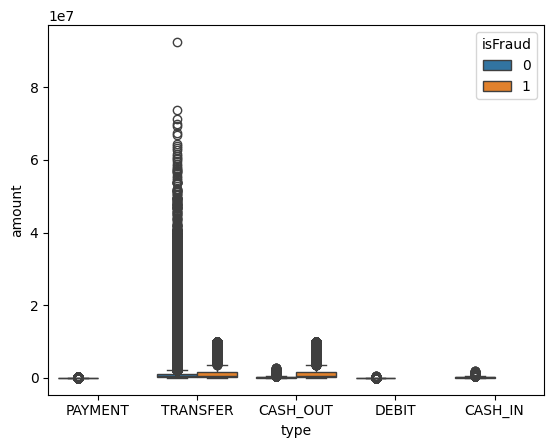

In [18]:
sns.boxplot(data=df, x="type", y="amount", hue="isFraud")

Note:
- Terdapat banyak outlier pada type transaksi transfer

# Feature Engineering

In [19]:
# Membuat kolom type2, yaitu backround pengirim dan penerima (Customer atau Merchant)

data = df
data['type2'] = np.nan
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), 'type2'] = 'CC'
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), 'type2'] = 'CM'
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MC'
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MM'

C:\Users\burv\AppData\Local\Temp\ipykernel_14644\518633604.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CC' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), 'type2'] = 'CC'


In [20]:
# Mengubah posisi kolom type2

new_order = [
    'step','type', 'type2', 'amount', 'nameOrig', 'oldbalanceOrig', 
    'newbalanceOrig', 'nameDest', 'oldbalanceDest', 
    'newbalanceDest', 'isFraud', 'isflaggedFraud'
]

data = data[new_order]

In [21]:
data.drop(columns = ['nameOrig','nameDest','isflaggedFraud'], axis = 'columns', inplace = True)

C:\Users\burv\AppData\Local\Temp\ipykernel_14644\596690178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['nameOrig','nameDest','isflaggedFraud'], axis = 'columns', inplace = True)


In [22]:
data.head()

,step,type,type2,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,CM,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,CM,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,CC,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,CC,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,CM,11668.14,41554.0,29885.86,0.0,0.0,0


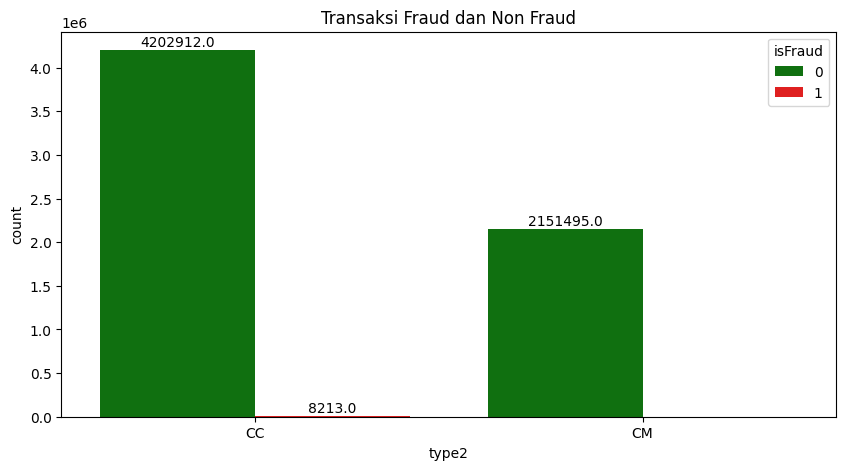

In [23]:
# Distribusi jumlah transaksi berdasarkan "type" dengan kategori "isfraud"

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="type2", hue="isFraud", palette=['green','red'], order=['CC','CM'])
plt.title("Transaksi Fraud dan Non Fraud")

for p in ax.patches:
    if p.get_height() > 10: 
        ax.annotate(
            '{:.1f}'.format(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height() + 5000), 
            ha='center', va='bottom'
        )

plt.show()

In [24]:
fraud_trans = data[data['isFraud'] == 1]
valid_trans = data[data['isFraud'] == 0]

print('Jumlah transaksi fraud menurut jenisnya (type2):\n', fraud_trans.type2.value_counts(), '\n')
print('Jumlah transaksi valid menurut jenisnya (type2):\n', valid_trans.type2.value_counts())

Jumlah transaksi fraud menurut jenisnya (type2):
 type2
CC    8213
Name: count, dtype: int64 

Jumlah transaksi valid menurut jenisnya (type2):
 type2
CC    4202912
CM    2151495
Name: count, dtype: int64


In [25]:
print("Ambang batas tertinggi transaksi fraud: ",fraud_trans.amount.max())
print("Ambang batas tertinggi transaksi valid: ",valid_trans.amount.max())

Ambang batas tertinggi transaksi fraud:  10000000.0
Ambang batas tertinggi transaksi valid:  92445516.64


In [26]:
print("Ambang batas terendah transaksi fraud: ",fraud_trans.amount.min())
print("Ambang batas terendah transaksi valid: ",valid_trans.amount.min())

Ambang batas terendah transaksi fraud:  0.0
Ambang batas terendah transaksi valid:  0.01


In [27]:
print("Ambang batas rata-rata transaksi fraud: ",fraud_trans.amount.mean())
print("Ambang batas rata-rata transaksi valid: ",valid_trans.amount.mean())

Ambang batas rata-rata transaksi fraud:  1467967.299140387
Ambang batas rata-rata transaksi valid:  178197.04172740763


Note:

1. **Jumlah Transaksi Berdasarkan Jenisnya (`type2`)**:
   - Untuk **fraud_trans**:
     - Jenis `CC`: 8.213 transaksi.
   - Untuk **valid_trans**:
     - Jenis `CC`: 4.202.912 transaksi.
     - Jenis `CM`: 2.151.495 transaksi.

2. **Ambang Batas Tertinggi Transaksi**:
   - **Transaksi Fraud**:
     - Nilai transaksi tertinggi: **10.000.000.0**.
   - **Transaksi Valid**:
     - Nilai transaksi tertinggi: **9.244.5516.64**.

3. **Ambang Batas Terendah Transaksi**:
   - **Transaksi Fraud**:
     - Nilai transaksi terendah: **0.0**.
   - **Transaksi Valid**:
     - Nilai transaksi terendah: **0.01**.

4. **Rata-Rata Nilai Transaksi**:
   - **Transaksi Fraud**:
     - Rata-rata nilai transaksi: **1.467.967,29**.
   - **Transaksi Valid**:
     - Rata-rata nilai transaksi: **178.197,04**.


Text(0.5, 1.0, 'Sebaran jumlah uang transaksi fraud')

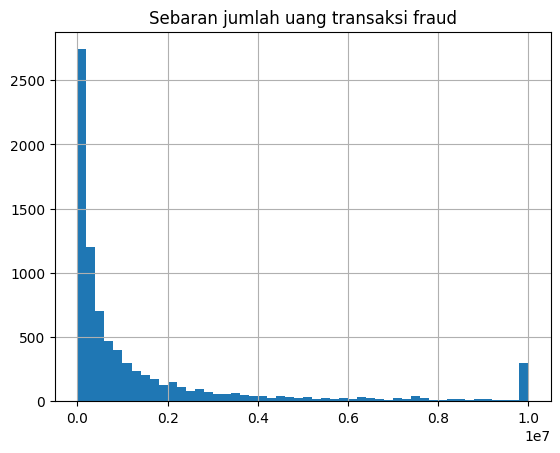

In [28]:
data[data['isFraud']==1]['amount'].hist(bins=50)
plt.title('Sebaran jumlah uang transaksi fraud')

Text(0.5, 1.0, 'Sebran jumlah uang transaksi valid')

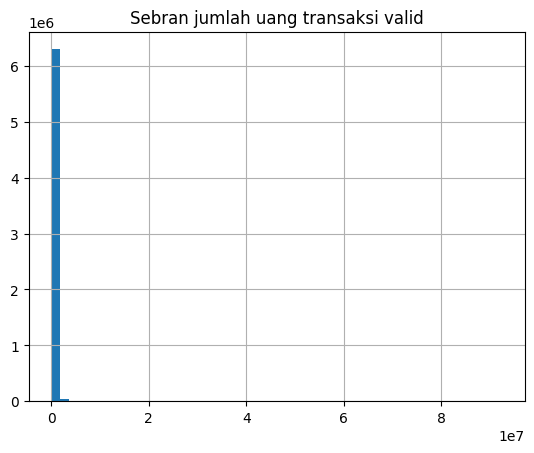

In [29]:
data[data['isFraud']==0]['amount'].hist(bins=50)
plt.title('Sebran jumlah uang transaksi valid')

# Visualization

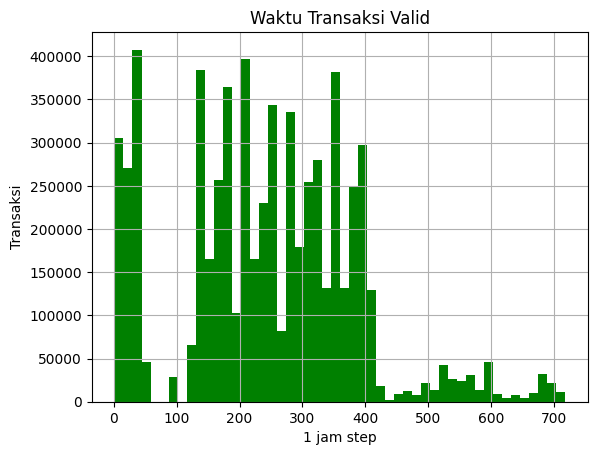

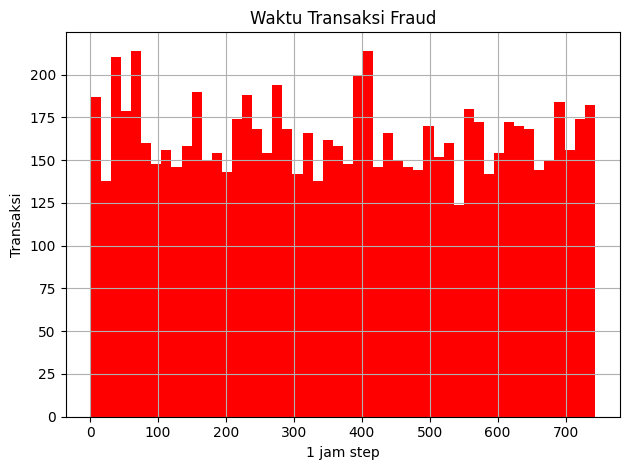

In [30]:
# Time patterns

bins = 50

valid_trans.hist(column="step",color="green",bins=bins)
plt.xlabel("1 jam step")
plt.ylabel("Transaksi")
plt.title("Waktu Transaksi Valid")

fraud_trans.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 jam step")
plt.ylabel("Transaksi")
plt.title("Waktu Transaksi Fraud")

plt.tight_layout()
plt.show()

Note:

- Transaksi fraud terjadi disemua waktu
- Transaksi valid terjadi hanya pada waktu tertentu 
    - step 0-50 dan 120-400 dengan frekuensi tinggi
    - step 430-700 dengan frekuensi rendah

In [31]:
# Mendapatkan jam dan hari dalam seminggu

num_days = 7
num_hours = 24
fraud_days = fraud_trans.step % num_days
fraud_hours = fraud_trans.step % num_hours
valid_days = valid_trans.step % num_days
valid_hours = valid_trans.step % num_hours
all_days = data.step % num_days
all_hours = data.step % num_hours



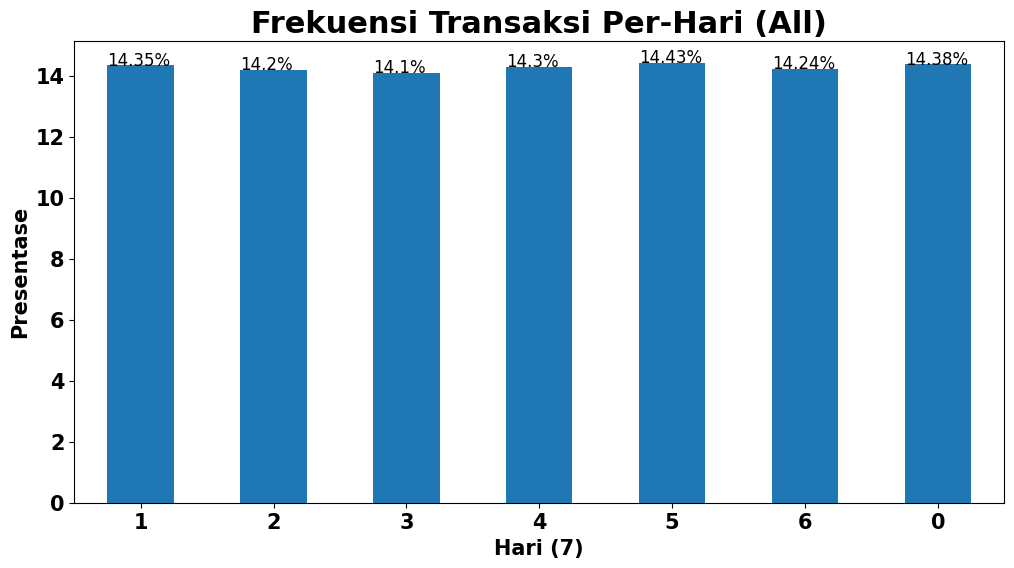

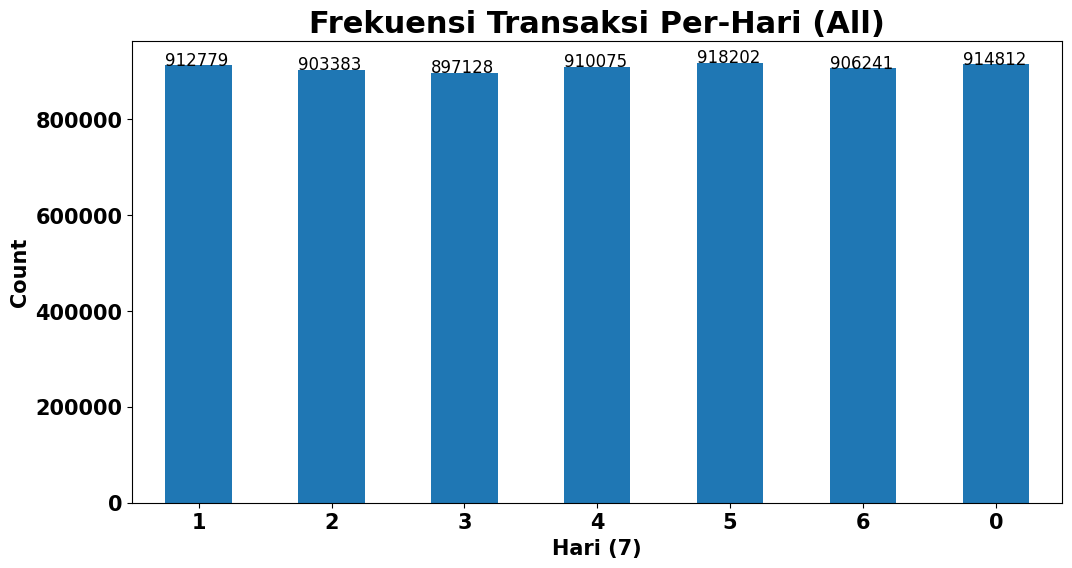

In [32]:
# number of transactions in each hour

plt.figure(figsize=(12,6))
ax = (all_days.value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Hari (7)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Presentase', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Hari (All)', fontsize=22, fontweight='bold')
plt.show()

plt.figure(figsize=(12,6))
ax = all_days.value_counts(sort=False).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.xlabel('Hari (7)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Hari (All)', fontsize=22, fontweight='bold')
plt.show()

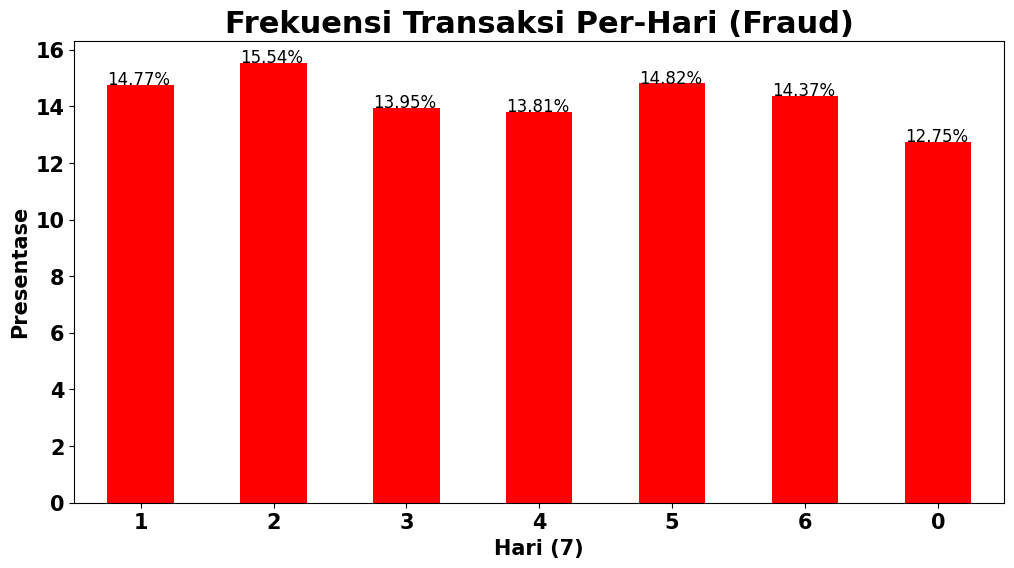

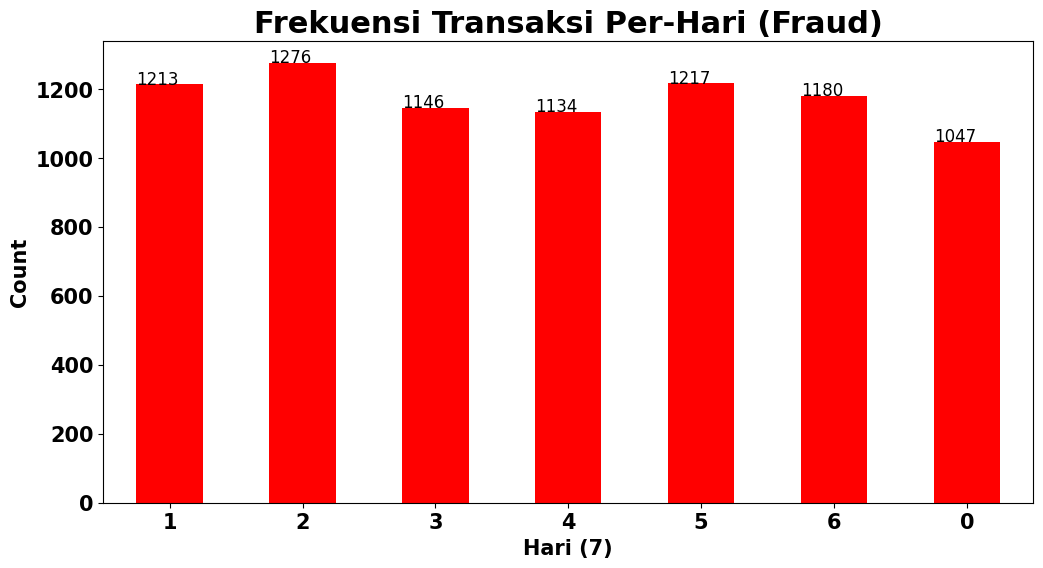

In [33]:
# number of transactions in each hour

plt.figure(figsize=(12,6))
ax = (fraud_days.value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar', color='red')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Hari (7)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Presentase', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Hari (Fraud)', fontsize=22, fontweight='bold')
plt.show()

plt.figure(figsize=(12,6))
ax = fraud_days.value_counts(sort=False).plot(kind='bar', color='red')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.xlabel('Hari (7)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Hari (Fraud)', fontsize=22, fontweight='bold')
plt.show()

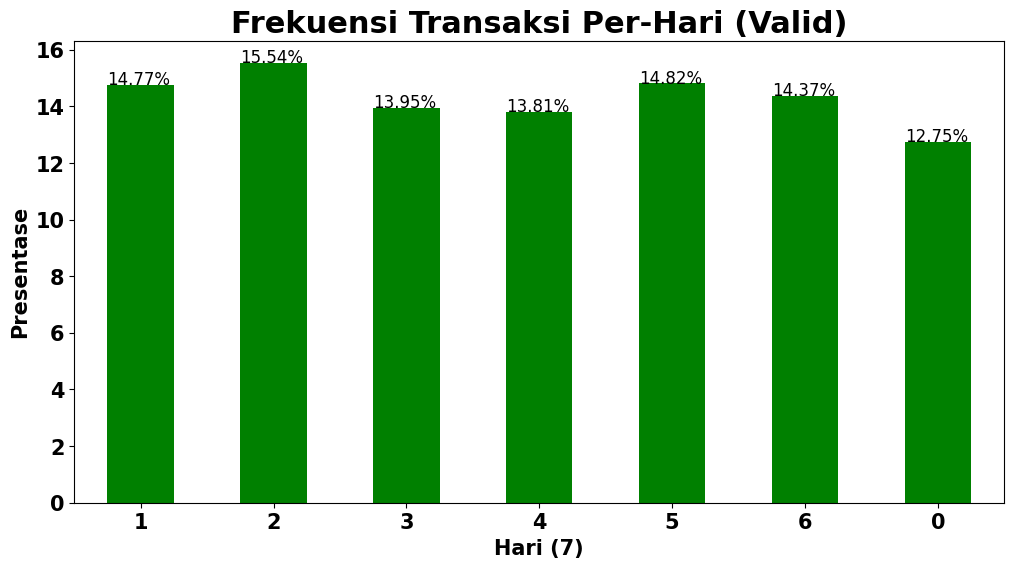

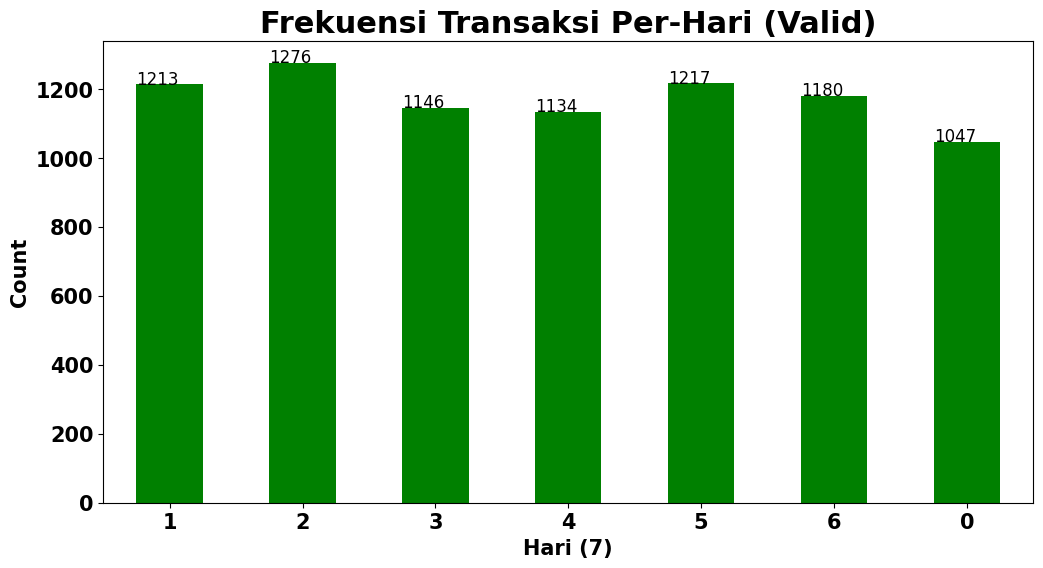

In [34]:
# number of transactions in each hour

plt.figure(figsize=(12,6))
ax = (fraud_days.value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar', color='green')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Hari (7)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Presentase', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Hari (Valid)', fontsize=22, fontweight='bold')
plt.show()

plt.figure(figsize=(12,6))
ax = fraud_days.value_counts(sort=False).plot(kind='bar',  color='green')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.xlabel('Hari (7)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Hari (Valid)', fontsize=22, fontweight='bold')
plt.show()

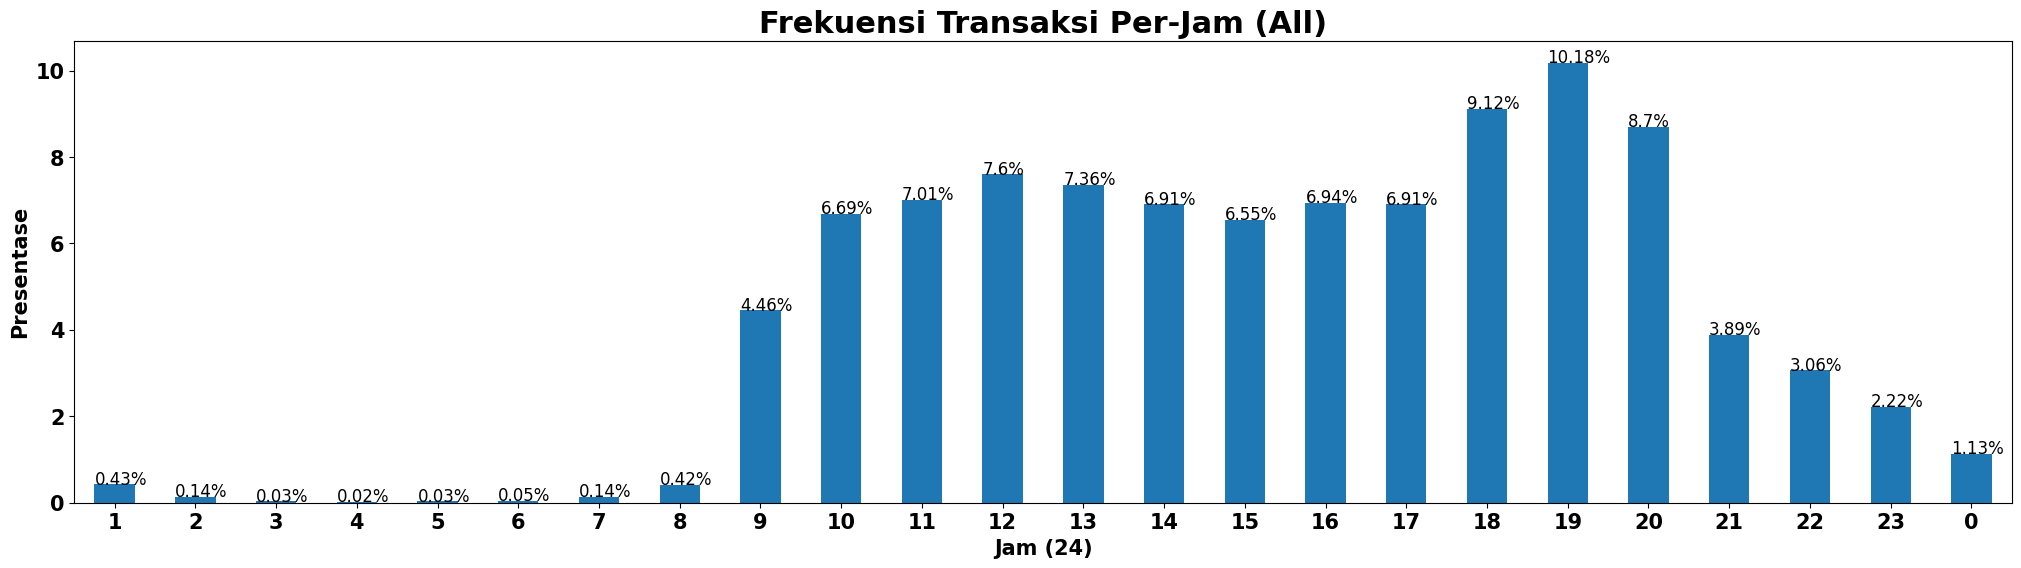

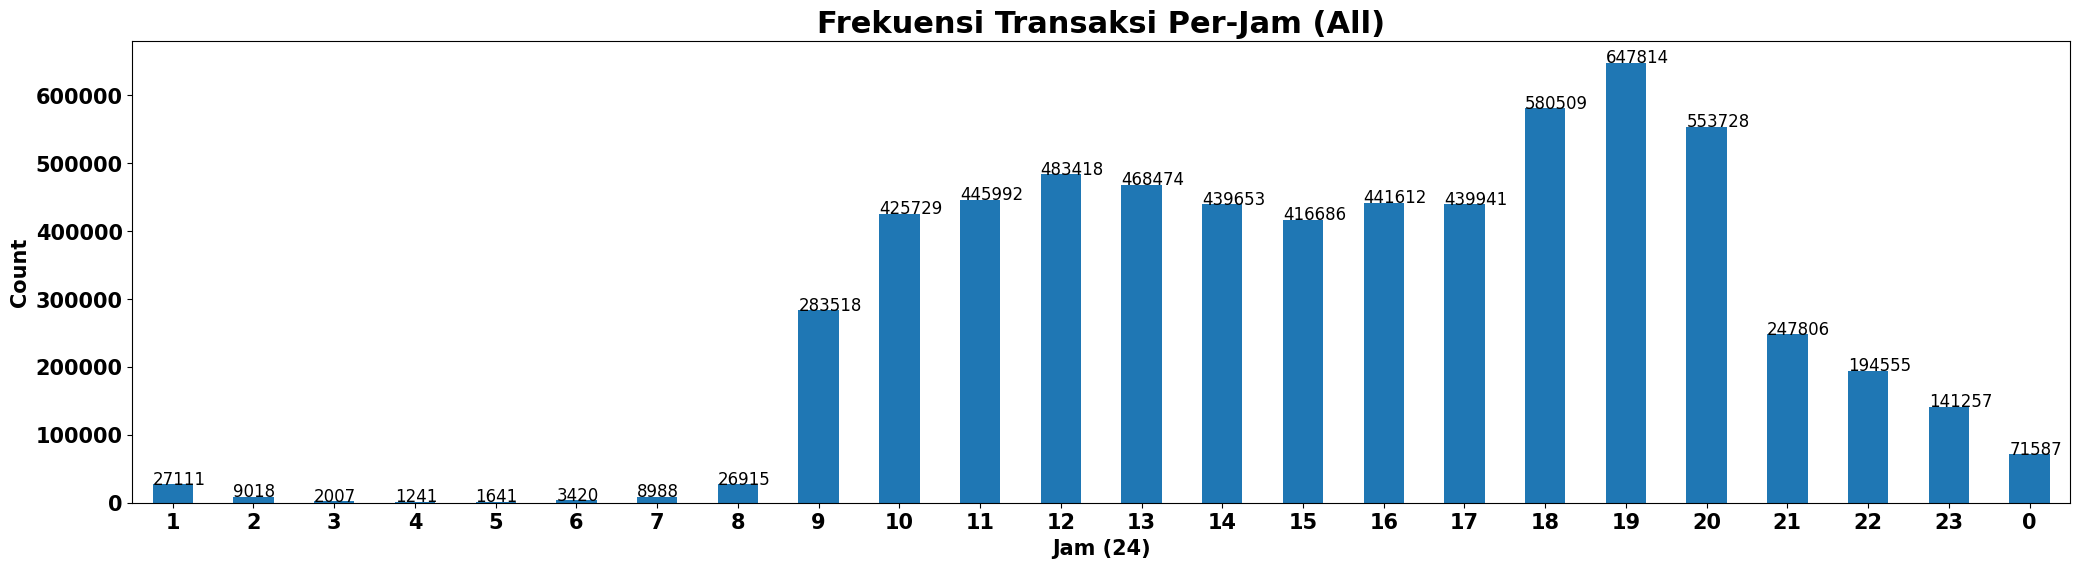

In [35]:
# number of transactions in each hour

plt.figure(figsize=(25,6))
ax = (all_hours.value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Jam (24)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Presentase', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Jam (All)', fontsize=22, fontweight='bold')
plt.show()


plt.figure(figsize=(25,6))
ax = all_hours.value_counts(sort=False).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.xlabel('Jam (24)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Jam (All)', fontsize=22, fontweight='bold')
plt.show()



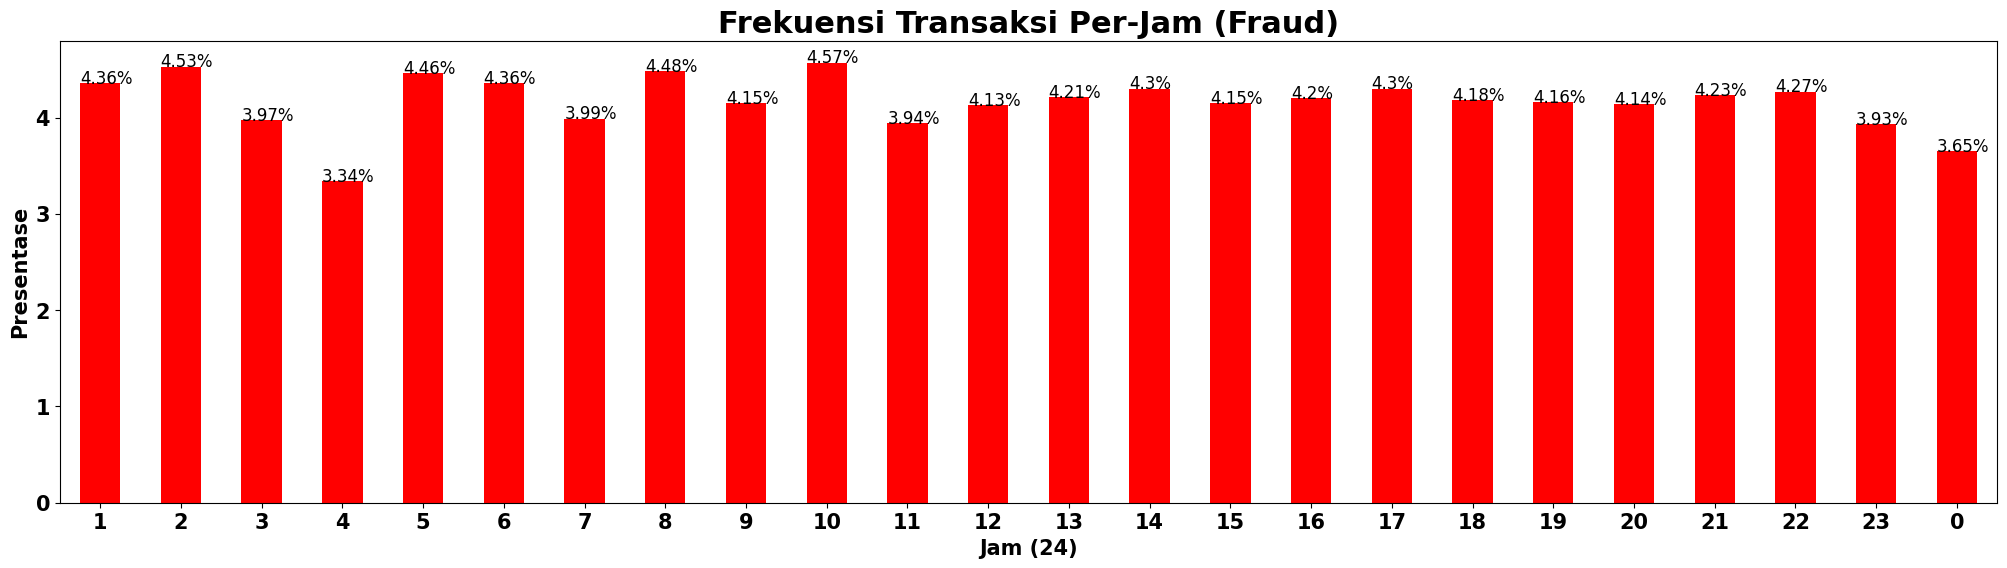

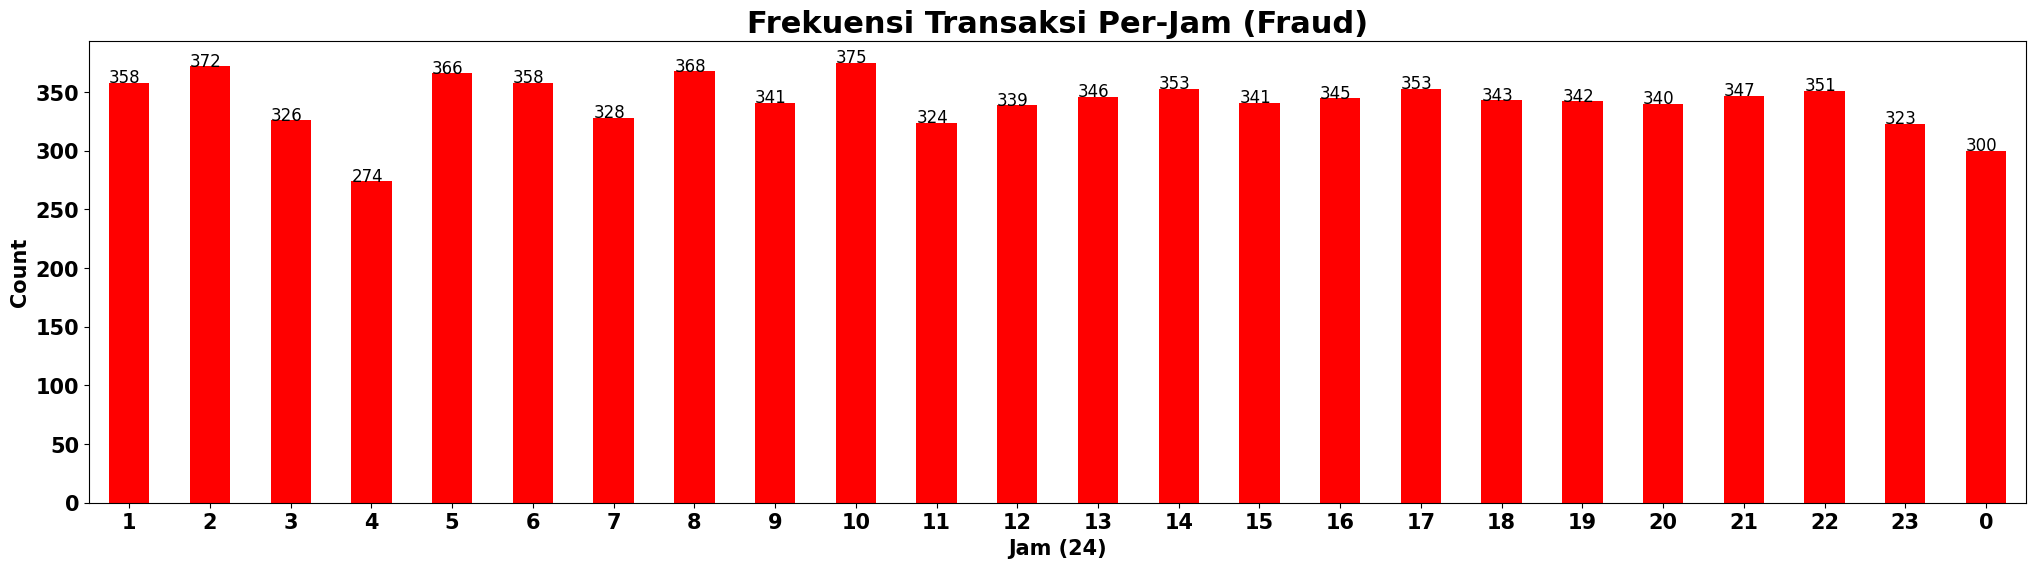

In [36]:
# number of transactions in each hour

plt.figure(figsize=(25,6))
ax = (fraud_hours.value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar',  color='red')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Jam (24)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Presentase', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Jam (Fraud)', fontsize=22, fontweight='bold')
plt.show()


plt.figure(figsize=(25,6))
ax = fraud_hours.value_counts(sort=False).plot(kind='bar',  color='red')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.xlabel('Jam (24)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Jam (Fraud)', fontsize=22, fontweight='bold')
plt.show()

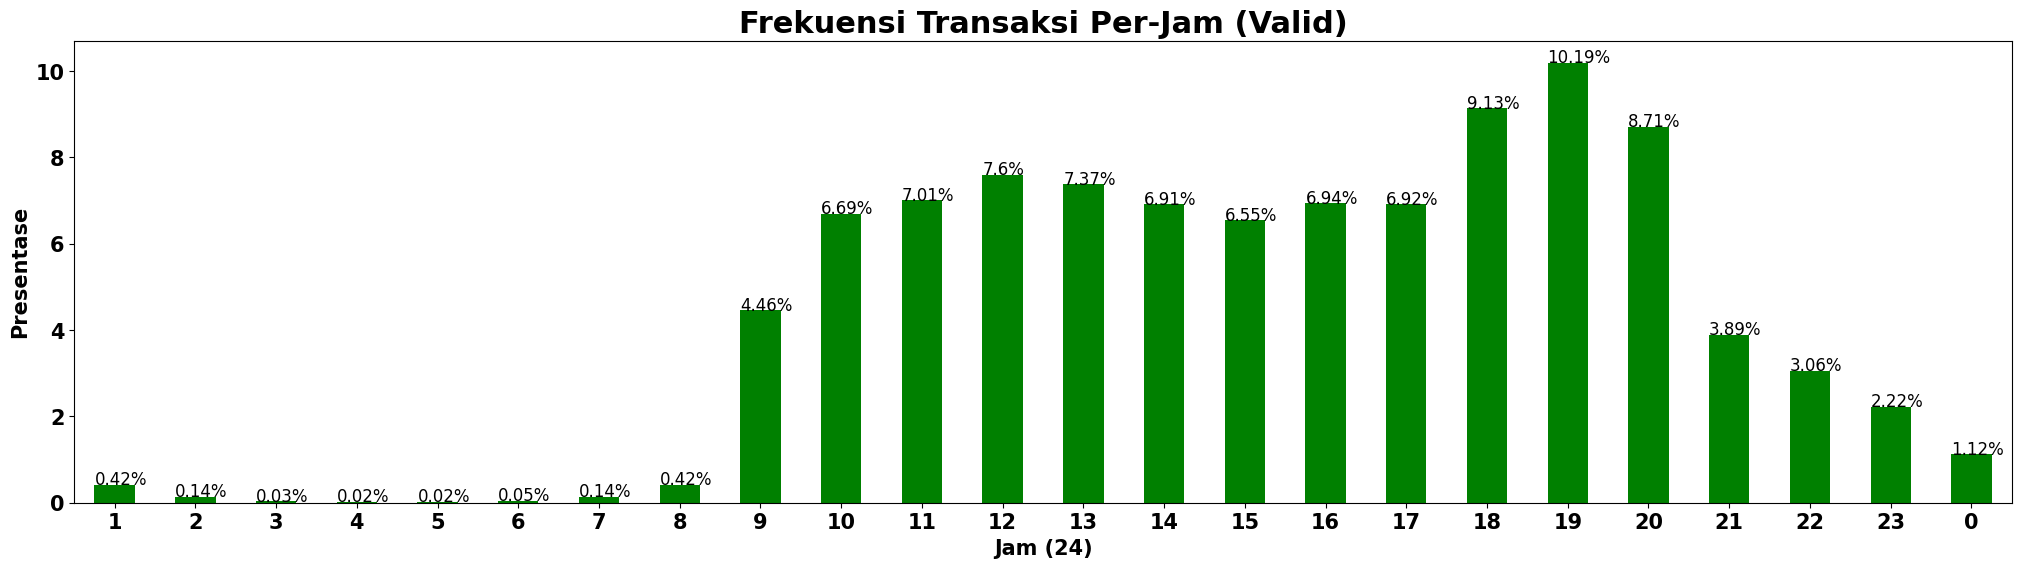

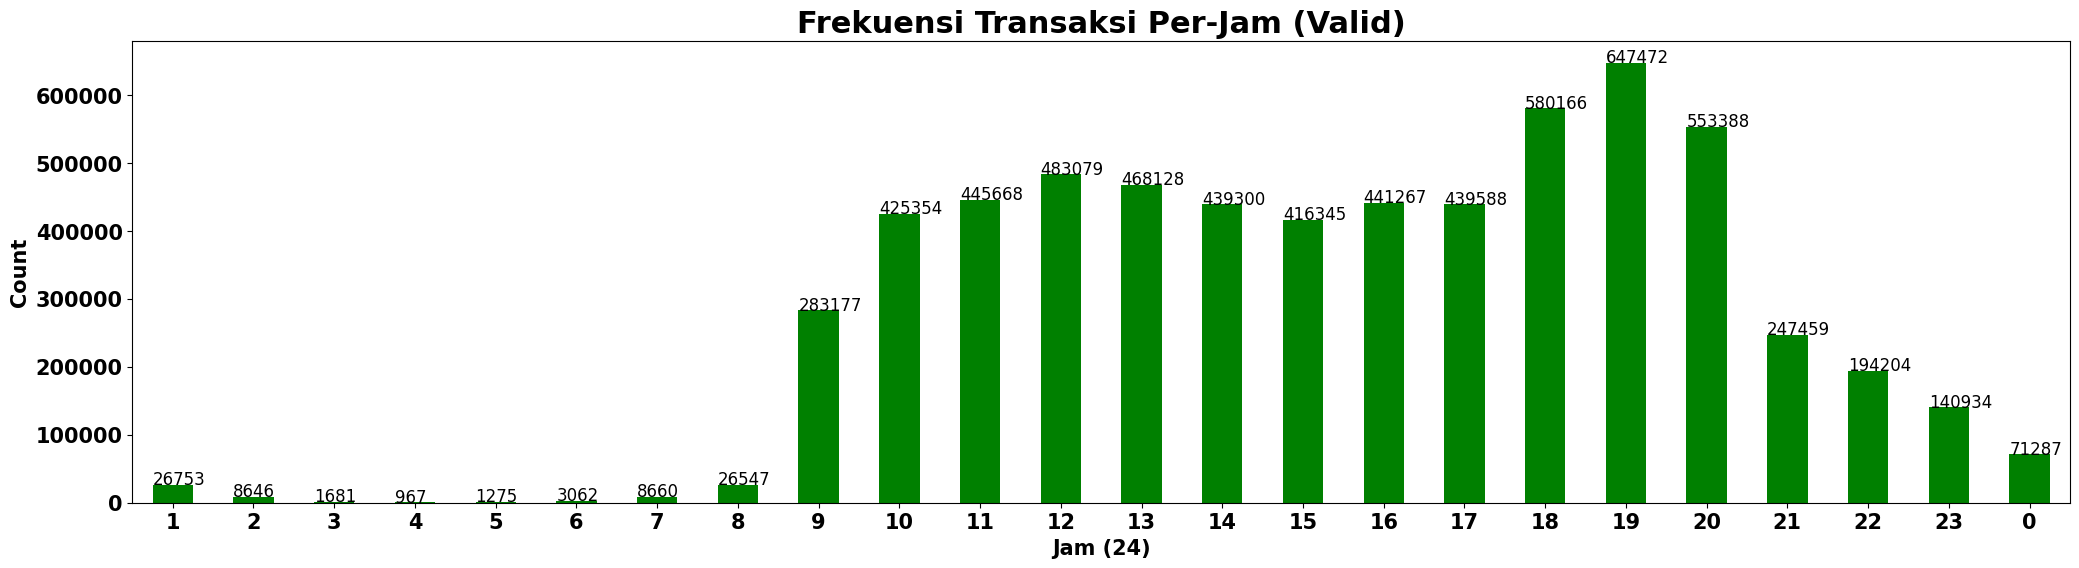

In [37]:
# number of transactions in each hour

plt.figure(figsize=(25,6))
ax = (valid_hours.value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar', color='green')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Jam (24)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Presentase', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Jam (Valid)', fontsize=22, fontweight='bold')
plt.show()


plt.figure(figsize=(25,6))
ax = valid_hours.value_counts(sort=False).plot(kind='bar',  color='green')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)), fontsize=12, color='black')
plt.xlabel('Jam (24)', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Frekuensi Transaksi Per-Jam (Valid)', fontsize=22, fontweight='bold')
plt.show()

Note:

- Frekuensi transaksi fraud lebih tinggi dihari kerja
- Frekuensi transaksi valid merata disemua hari

# Data Preprocessing

In [38]:
valid_trans = valid_trans.sample(n=8213)
data = pd.concat([valid_trans, fraud_trans], axis=0)

In [39]:
# Encoding

label_encoder = LabelEncoder()


data['type'] = label_encoder.fit_transform(data['type'])

# Cetak mapping kategori ke angka
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping kategori ke angka (type):", mapping)

Mapping kategori ke angka (type): {'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


In [40]:
data['type2'] = label_encoder.fit_transform(data['type2'])

# Cetak mapping kategori ke angka
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping kategori ke angka (type2):", mapping)

Mapping kategori ke angka (type2): {'CC': np.int64(0), 'CM': np.int64(1)}


Note:

- Encoding feature type: 
    - CASH_IN : 0
    - CASH_OUT : 1
    - DEBIT : 2 
    - PAYMENT : 3
    - TRANSFER : 4
- Encoding feature type: 
    - CC : 0 
    - CM : 1



In [41]:
data.head()

,step,type,type2,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4370008,310,1,0,62442.44,0.0,0.0,143713.58,206156.02,0
5585,6,1,0,139845.98,0.0,0.0,158028.52,6192.55,0
5653334,396,4,0,2245839.33,0.0,0.0,9858971.98,12104811.32,0
1125082,131,1,0,551906.10,11046.0,0.0,987150.17,1581620.40,0
53901,9,4,0,371816.17,0.0,0.0,875450.99,1285883.99,0


In [42]:
# Resampling

X = data.drop(columns=['isFraud'], axis=1)
y = data.isFraud

print("Sebelum Resampling:")
counts = y.value_counts()
print(counts)

Sebelum Resampling:
isFraud
0    8213
1    8213
Name: count, dtype: int64


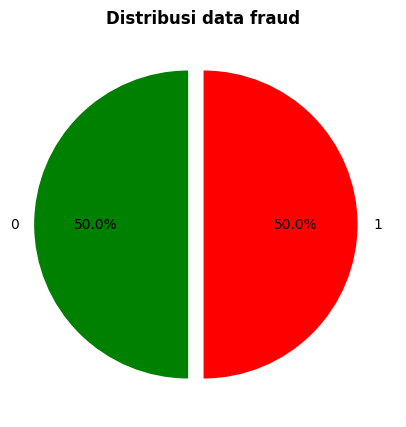

In [43]:
# Membuat pie chart distribusi fraud

plt.figure(figsize=(8, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["green", "red"], startangle=90, explode=[0.1, 0])
plt.title("Distribusi data fraud", fontweight="bold")
plt.show()


Note:

- Imbalance data terjadi sangat signifikan, yaitu transaksi valid ( 6.354.407-99,9%) dan transaksi fraud (8.213-0,1%)

In [44]:

# smote = SMOTE(random_state=42)

# # Melakukan resampling
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print("\nSetelah Resampling:")
# print(y_resampled.value_counts())


In [45]:
# plt.figure(figsize=(8, 5))
# plt.pie(y_resampled.value_counts(), labels=counts.index, autopct='%1.1f%%', colors=["green", "red"], startangle=90, explode=[0.1, 0])
# plt.title("Distribusi data fraud", fontweight="bold")
# plt.show()

Note: 

- Setelah dilakukan handling imbalace data, data telah proporsional antara transaksi valid ( 6.354.407-50% ) dan fraud ( 6.354.407-50% )

In [46]:
# X = X_resampled
# y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y, random_state=42)

# Standarization

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [47]:

print(df.shape)
print(X.shape)
print(X_train.shape)


(6362620, 12)
(16426, 8)
(11498, 8)


Note:

- Splitting data dengan data training 70% dan data testing 30%
- Melakukan standarization untuk memaksimalkan kinerja model

# Modeling

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42) #CART-Breiman-84-Dasar
rfc=RandomForestClassifier(n_estimators = 10, n_jobs = -1, random_state = 42) #Random Forest-Leo Breiman-01-advance(ensemble)
xgbr = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 42, learning_rate = 0.1) #XGBoost-Tianqi Chen-14-advance(GBDT)


In [49]:
# Train Model
model_dtc = dtc.fit(X_train, y_train)
model_rfc = rfc.fit(X_train, y_train)
model_xgbr = xgbr.fit(X_train, y_train)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 4370008 to 6362619
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   type2           16426 non-null  int64  
 3   amount          16426 non-null  float64
 4   oldbalanceOrig  16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   oldbalanceDest  16426 non-null  float64
 7   newbalanceDest  16426 non-null  float64
 8   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


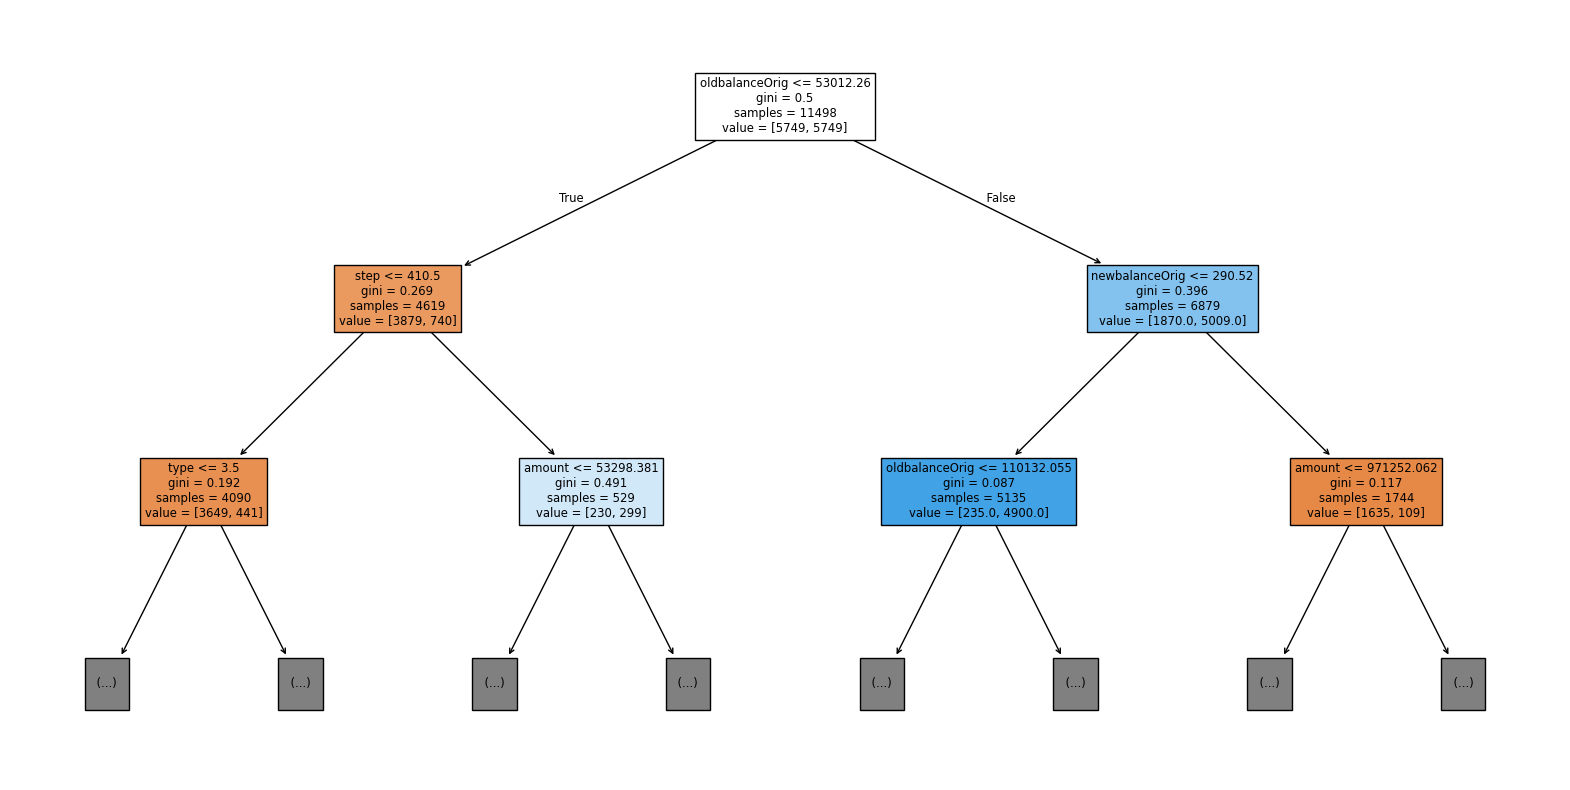

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Atur ukuran sesuai kebutuhan (lebar, tinggi)

feature_names =  ['step','type','type2','amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']

# Memvisualisasikan pohon keputusan
plot_tree(model_dtc, feature_names=feature_names,max_depth=2, filled=True)

# Menampilkan plot
plt.show()



In [52]:
# k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold
cv_scores_dtc = cross_val_score(model_dtc, X, y, cv=kf, scoring='accuracy')
cv_scores_rfc = cross_val_score(model_rfc, X, y, cv=kf, scoring='accuracy')
cv_scores_xgbr = cross_val_score(model_xgbr, X, y, cv=kf, scoring='accuracy')

# Output hasil
print(f"Accuracy per fold dtc: {cv_scores_dtc}")
print(f"Mean accuracy dtc: {cv_scores_dtc.mean():.4f}")
print(f"Accuracy per fold rfc: {cv_scores_rfc}")
print(f"Mean accuracy rfc: {cv_scores_rfc.mean():.4f}")
print(f"Accuracy per fold xgbr: {cv_scores_xgbr}")
print(f"Mean accuracy xgbr: {cv_scores_xgbr.mean():.4f}")

Accuracy per fold dtc: [0.98387097 0.9805175  0.97229833 0.97108067 0.9695586 ]
Mean accuracy dtc: 0.9755
Accuracy per fold rfc: [0.98874011 0.98843227 0.99269406 0.99238965 0.98812785]
Mean accuracy rfc: 0.9901
Accuracy per fold xgbr: [0.98508825 0.98447489 0.98995434 0.98721461 0.98721461]
Mean accuracy xgbr: 0.9868


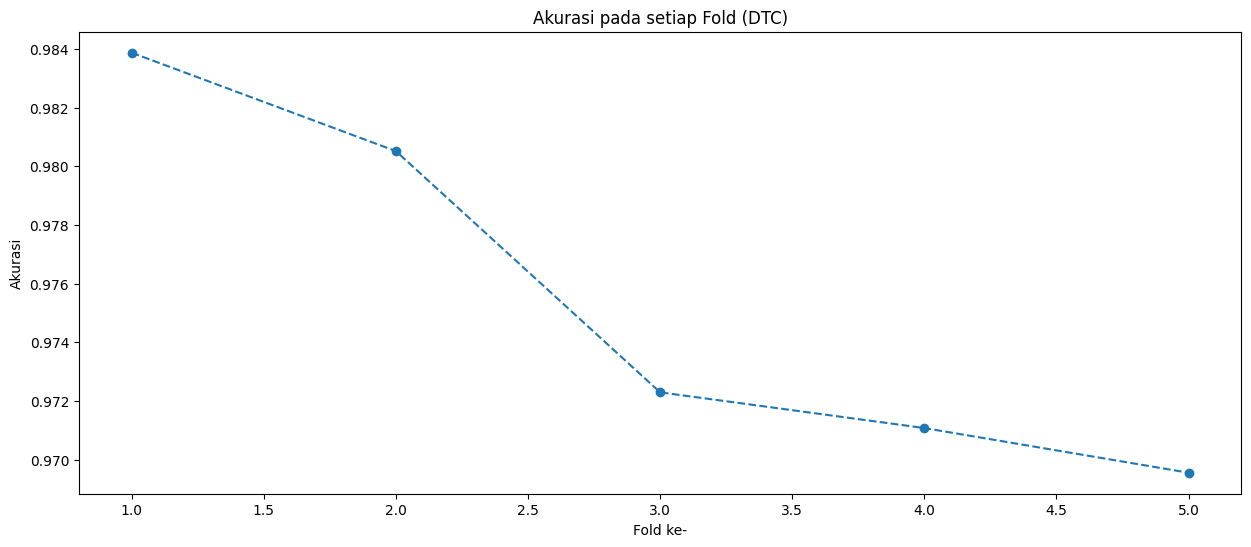

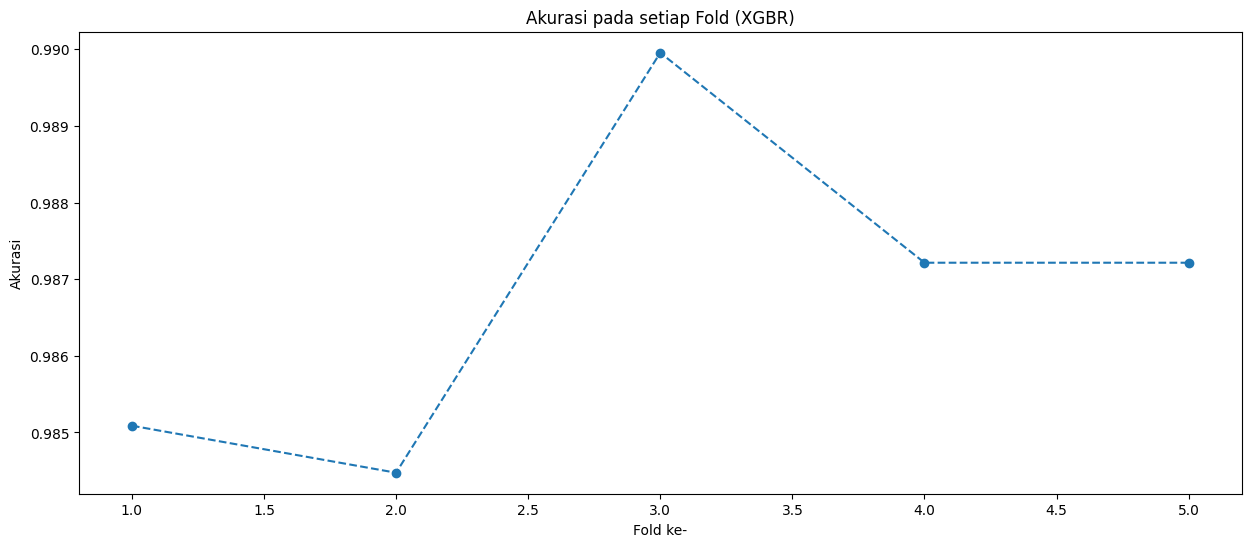

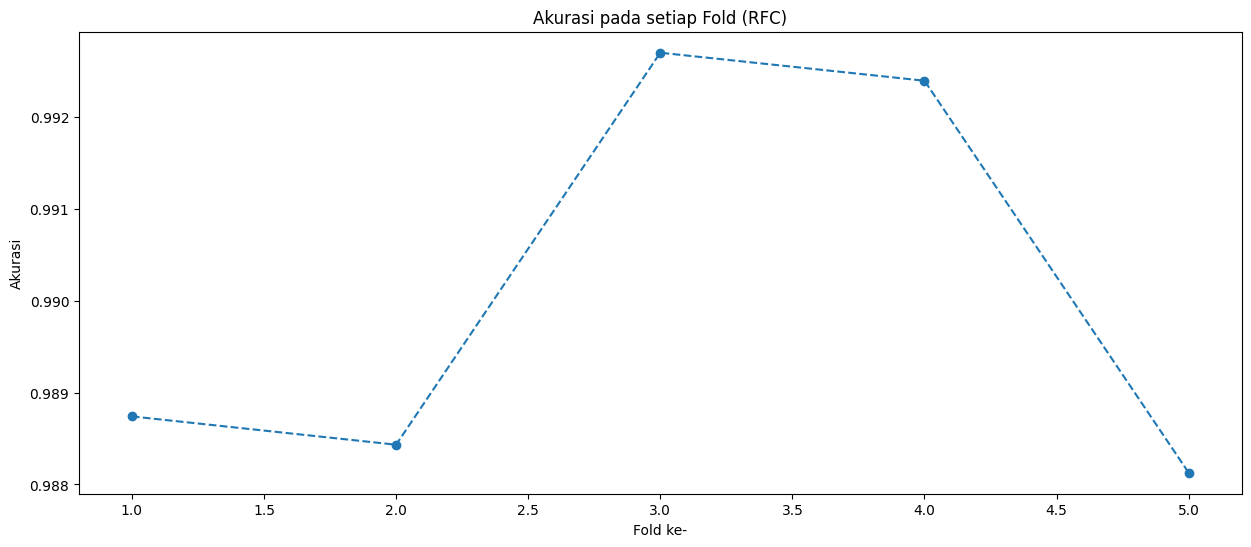

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 6), cv_scores_dtc, marker='o', linestyle='--')
plt.title('Akurasi pada setiap Fold (DTC)')
plt.xlabel('Fold ke-')
plt.ylabel('Akurasi')
plt.show()


plt.figure(figsize=(15, 6))
plt.plot(range(1, 6), cv_scores_xgbr, marker='o', linestyle='--')
plt.title('Akurasi pada setiap Fold (XGBR)')
plt.xlabel('Fold ke-')
plt.ylabel('Akurasi')
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(range(1, 6), cv_scores_rfc, marker='o', linestyle='--')
plt.title('Akurasi pada setiap Fold (RFC)')
plt.xlabel('Fold ke-')
plt.ylabel('Akurasi')
plt.show()

In [54]:
# Prediksi
y_pred_dtc = model_dtc.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_xgbr = model_xgbr.predict(X_test)

# Evaluation

## Evaluation Decision Tree

In [55]:
# evaluasi Klasifikasi
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2464
           1       0.99      0.96      0.97      2464

    accuracy                           0.97      4928
   macro avg       0.97      0.97      0.97      4928
weighted avg       0.97      0.97      0.97      4928



In [56]:
accuracy_clf = accuracy_score(y_test, y_pred_dtc)
precision_clf = precision_score(y_test, y_pred_dtc)
recall_clf = recall_score(y_test, y_pred_dtc)
f1_score_clf = f1_score(y_test, y_pred_dtc)
auc_clf = roc_auc_score(y_test, y_pred_dtc)

cm = confusion_matrix(y_test, y_pred_dtc)
true_negative = cm[0, 0]
false_positive = cm[0, 1]
specificity_clf = true_negative / (true_negative + false_positive)

print(f'Accuracy Decision Tree: {accuracy_clf}')
print(f'Precision Decision Tree: {precision_clf}')
print(f'Recall Decision Tree: {recall_clf}')
print(f'Specificity Decision Tree: {specificity_clf}')
print(f'F1 Score Decision Tree: {f1_score_clf}')
print(f'AUC Decision Tree: {auc_clf}')


Accuracy Decision Tree: 0.9732142857142857
Precision Decision Tree: 0.9858333333333333
Recall Decision Tree: 0.9602272727272727
Specificity Decision Tree: 0.9862012987012987
F1 Score Decision Tree: 0.9728618421052632
AUC Decision Tree: 0.9732142857142857


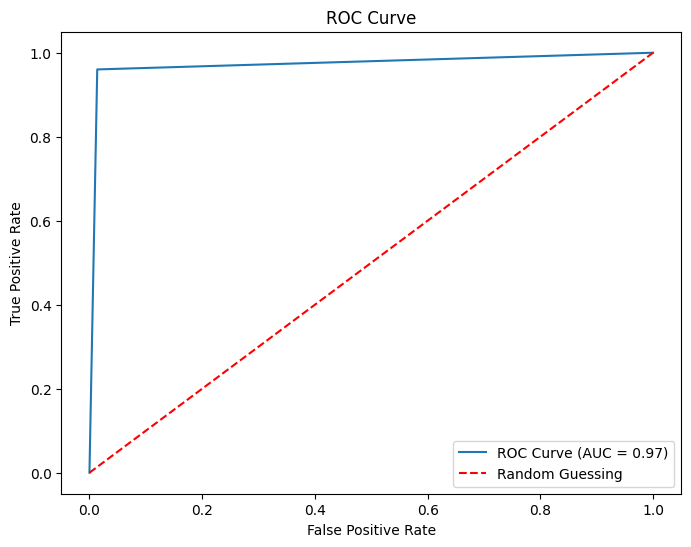

In [57]:
# Kurva ROC DTC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_clf:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Text(113.9222222222222, 0.5, 'Predict Label')

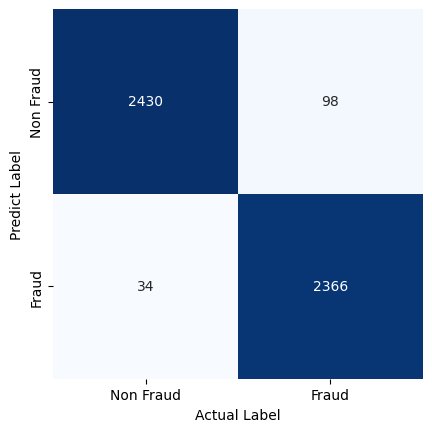

In [58]:
# Memvisualisasikan Confusion Matrix
mat = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap='Blues', cbar=False, 
            xticklabels=['Non Fraud', 'Fraud'], 
            yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Actual Label')
plt.ylabel('Predict Label')

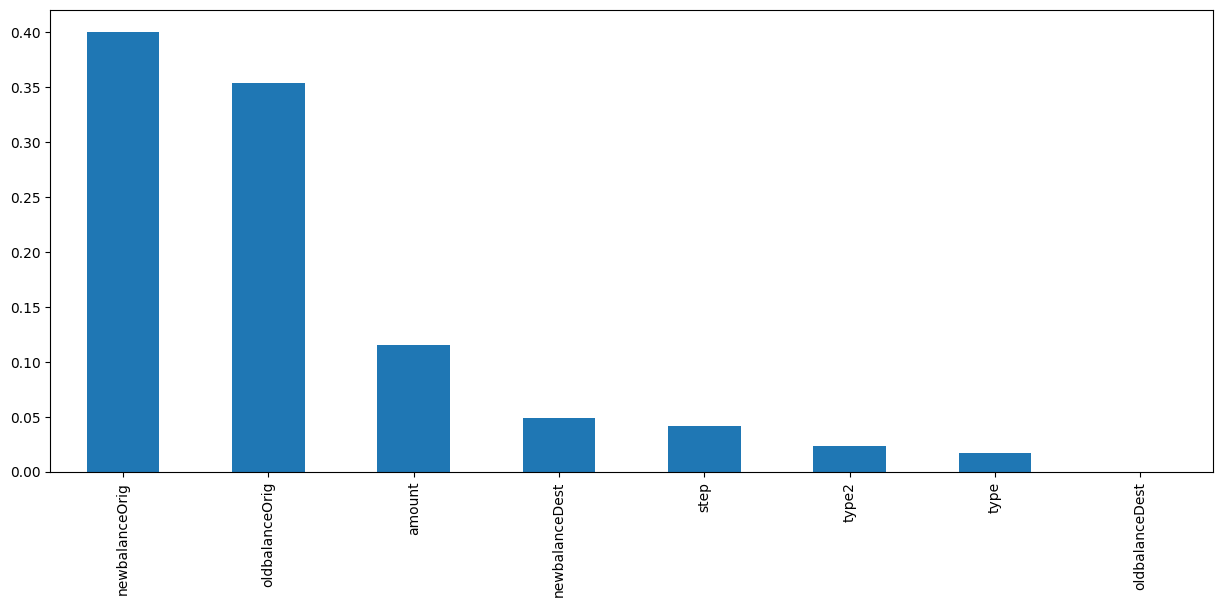

In [59]:
# Signifikan factor model

plt.figure(figsize=(15, 6))
feat_importances = pd.Series(model_dtc.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

## Evaluation Random Forest

In [60]:
# evaluasi Klasifikasi
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2464
           1       0.99      1.00      0.99      2464

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [61]:
auc_rfc = roc_auc_score(y_test, y_pred_rfc)
print(f'AUC Random Forest: {auc_rfc}')

AUC Random Forest: 0.9902597402597402


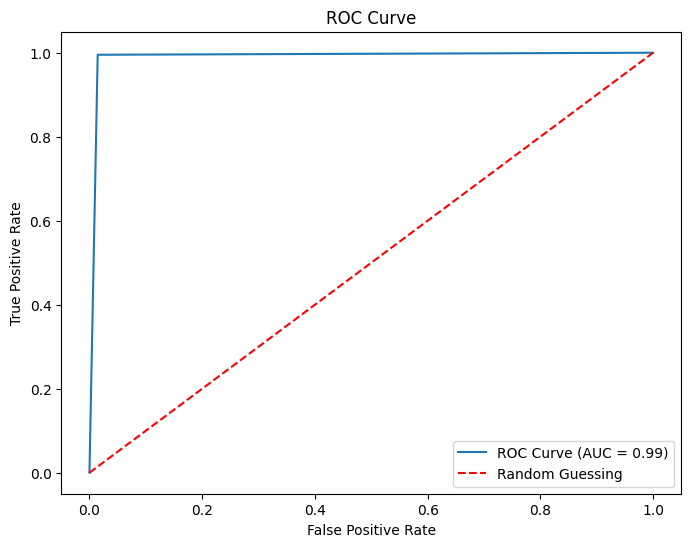

In [62]:
# Kurva ROC DTC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Text(113.9222222222222, 0.5, 'Predict Label')

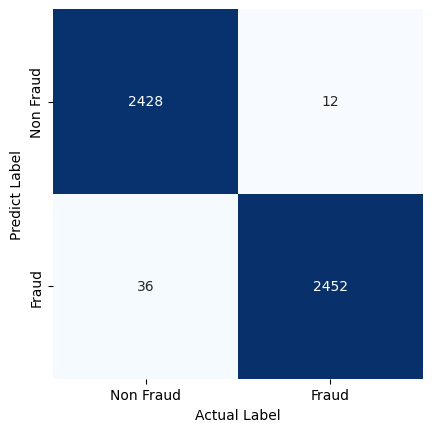

In [63]:
# Memvisualisasikan Confusion Matrix
mat = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap='Blues', cbar=False, 
            xticklabels=['Non Fraud', 'Fraud'], 
            yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Actual Label')
plt.ylabel('Predict Label')

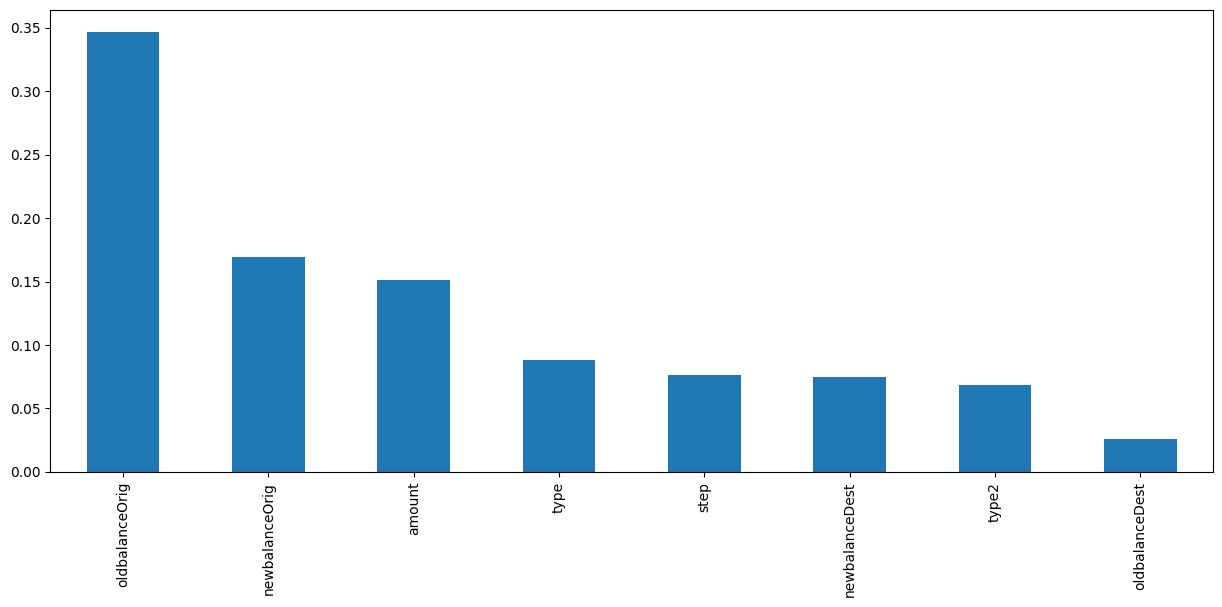

In [64]:
# Signifikan factor model

plt.figure(figsize=(15, 6))
feat_importances = pd.Series(model_rfc.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

## Evaluation XGBoost

In [65]:
# evaluasi Klasifikasi
print(classification_report(y_test,y_pred_xgbr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2464
           1       0.98      1.00      0.99      2464

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [66]:
auc_xgbr = roc_auc_score(y_test, y_pred_xgbr)
print(f'AUC Random Forest: {auc_xgbr}')

AUC Random Forest: 0.9880275974025974


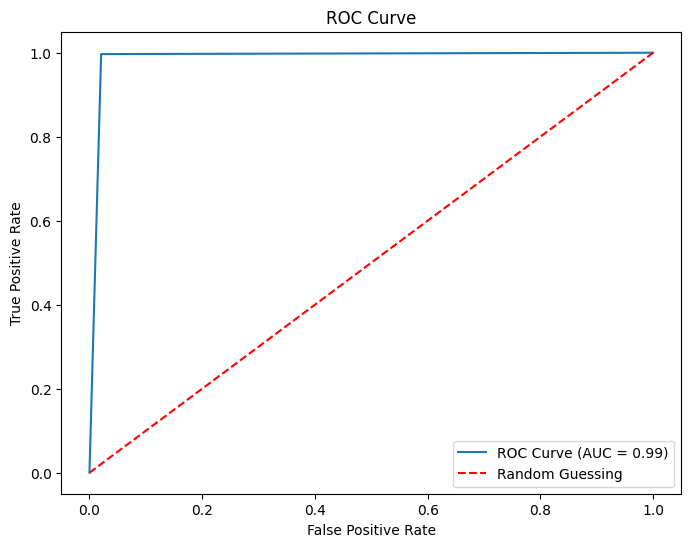

In [67]:
# Kurva ROC DTC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_xgbr:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Text(113.9222222222222, 0.5, 'Predict Label')

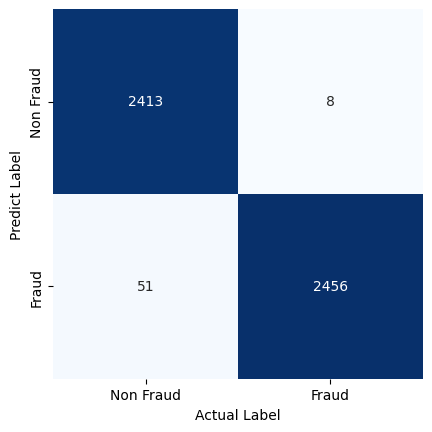

In [68]:
# Memvisualisasikan Confusion Matrix
mat = confusion_matrix(y_test, y_pred_xgbr)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap='Blues', cbar=False, 
            xticklabels=['Non Fraud', 'Fraud'], 
            yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Actual Label')
plt.ylabel('Predict Label')

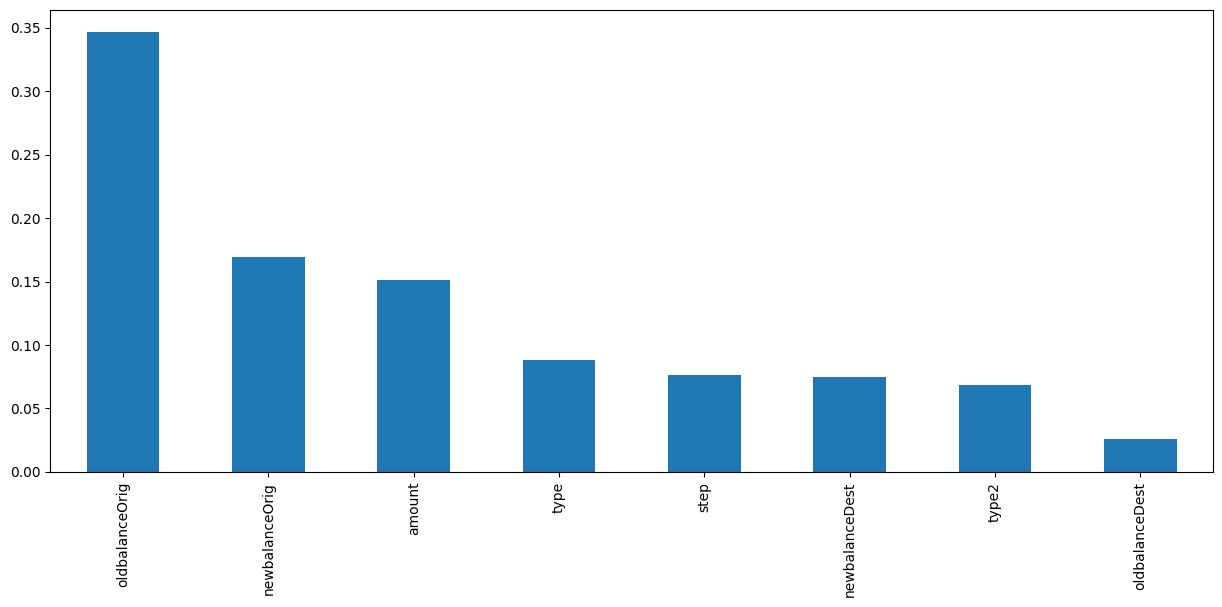

In [69]:
# Signifikan factor model

plt.figure(figsize=(15, 6))
feat_importances = pd.Series(model_rfc.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [70]:
# #  model 

# import joblib

# # pickle.dump(classifier, open("model.pkl", "wb"))
# filename1 = 'model_dtc.joblib'
# joblib.dump(model_dtc, filename1)

# filename2 = 'model_rfc.joblib'
# joblib.dump(model_rfc, filename2)

# filename3 = 'model_xgbr.joblib'
# joblib.dump(model_xgbr, filename3)


In [79]:
# Save model
import pickle

with open('model_rfc.pkl', 'wb') as file:
    pickle.dump(model_rfc, file)

In [81]:
data_test = data
data_test = data_test.drop(columns=['isFraud'], axis=1)

In [82]:
# Ekspor ke file CSV
data_test.to_csv('data_test.csv', index=False)  # index=False agar tidak menyertakan indeks
print("DataFrame berhasil diekspor ke file CSV")

DataFrame berhasil diekspor ke file CSV


In [77]:
data_baru = [[2, 1, 0, 163717.43, 0.0, 0.0, 10909136.43, 11073556.18]]  # Bentuk 2D
data_baru_2 = [[743,1,0,850002.52,850002.52,0.0,6510099.11,7360101.63]]  # Bentuk 2D
prediksi_baru = model_rfc.predict(data_baru_2)
print(f"Prediksi data baru: {prediksi_baru}")


Prediksi data baru: [1]


C:\Users\burv\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
